#For feature engineering

In [ ]:
import random
import math
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from itertools import combinations
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score


In [ ]:
id_1 = 8092 #change to first student id
id_2 = 7972 #change to second student id
id_3 = 8088 #change to third student id "leave 0000 if team of 2"
random_seed = id_1+id_2+id_3
random.seed(random_seed)
data_path="Data.csv"#replace with data path
output_path="your_data.csv"#replace with output data path

all_data=pd.read_csv(data_path)
all_columns = all_data.columns.tolist()

target_column = 'smoking'

all_columns.remove(target_column)

selected_columns = random.sample(all_columns, 10)

print(selected_columns) #MUST BE PRINTED
selected_columns = np.append(selected_columns, target_column)
sample_df = all_data[selected_columns].copy()
sample_df.to_csv(output_path)   #From HERE YOU CAN SPLIT FOR TRAIN ,VALID AND TEST

['age', 'relaxation', 'hemoglobin', 'id', 'LDL', 'hearing(right)', 'Gtp', 'eyesight(left)', 'fasting blood sugar', 'hearing(left)']


In [ ]:
# Check for unique values in each column to identify potential categorical data
for column in sample_df.columns:
    print(f"{column}: {sample_df[column].unique()[:10]}")  # Display first 10 unique values

age: [55 70 20 35 30 50 45 40 60 25]
relaxation: [87 83 75 88 76 95 91 80 70 60]
hemoglobin: [16.5 16.2 17.4 15.9 15.4 13.  14.5 15.7 13.2 12.9]
id: [0 1 2 3 4 5 6 7 8 9]
LDL: [ 75 126  93 102  99 122 198 150 101  56]
hearing(right): [1 2]
Gtp: [ 27  37  53  30  17 119  16  31  14   8]
eyesight(left): [0.5 0.6 0.4 1.5 1.2 0.7 0.8 1.  2.  0.9]
fasting blood sugar: [ 94 147  79  91 101  84 100 104  64  71]
hearing(left): [1 2]
smoking: [1 0]


In [ ]:
X = sample_df.iloc[:, :-1]
y = sample_df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


model_before = RandomForestClassifier(random_state=42)
model_before.fit(X_train, y_train)
y_pred_before = model_before.predict(X_test)
accuracy_before = accuracy_score(y_test, y_pred_before)

In [ ]:
sample_df.head()

,age,relaxation,hemoglobin,id,LDL,hearing(right),Gtp,eyesight(left),fasting blood sugar,hearing(left),smoking
0,55,87,16.5,0,75,1,27,0.5,94,1,1
1,70,83,16.2,1,126,2,37,0.6,147,2,0
2,20,75,17.4,2,93,1,53,0.4,79,1,1
3,35,88,15.9,3,102,1,30,1.5,91,1,0
4,30,76,15.4,4,93,1,17,1.5,91,1,1


`Feature Engineering`

 Drop unnecessary columns

In [ ]:
if 'id' in sample_df.columns:
    df1 = sample_df.drop(columns=['id'])
else:
    df1 = sample_df.copy()

 Display the cleaned dataset

In [ ]:
df1.head()

,age,relaxation,hemoglobin,LDL,hearing(right),Gtp,eyesight(left),fasting blood sugar,hearing(left),smoking
0,55,87,16.5,75,1,27,0.5,94,1,1
1,70,83,16.2,126,2,37,0.6,147,2,0
2,20,75,17.4,93,1,53,0.4,79,1,1
3,35,88,15.9,102,1,30,1.5,91,1,0
4,30,76,15.4,93,1,17,1.5,91,1,1


 Handle missing values before any other processing


Check for missing values in the dataset

In [ ]:
print("\nMissing values in each column:\n", df1.isnull().sum())


Missing values in each column:
 age                    0
relaxation             0
hemoglobin             0
LDL                    0
hearing(right)         0
Gtp                    0
eyesight(left)         0
fasting blood sugar    0
hearing(left)          0
smoking                0
dtype: int64


In [ ]:
numerical_columns = ['age', 'relaxation', 'hemoglobin', 'LDL', 'Gtp', 'eyesight(left)', 'fasting blood sugar']
categorical_columns = ['hearing(left)', 'hearing(right)']

Convert 'smoking' to categorical type

In [ ]:
df1[target_column] = df1[target_column].astype('category')

In [ ]:
df1[categorical_columns] = df1[categorical_columns].astype('category')
for column in categorical_columns:
    if column in df1.columns:
        df1[column] = df1[column].astype('category')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype   
---  ------               --------------   -----   
 0   age                  159256 non-null  int64   
 1   relaxation           159256 non-null  int64   
 2   hemoglobin           159256 non-null  float64 
 3   LDL                  159256 non-null  int64   
 4   hearing(right)       159256 non-null  category
 5   Gtp                  159256 non-null  int64   
 6   eyesight(left)       159256 non-null  float64 
 7   fasting blood sugar  159256 non-null  int64   
 8   hearing(left)        159256 non-null  category
 9   smoking              159256 non-null  category
dtypes: category(3), float64(2), int64(5)
memory usage: 9.0 MB


Before Normalization

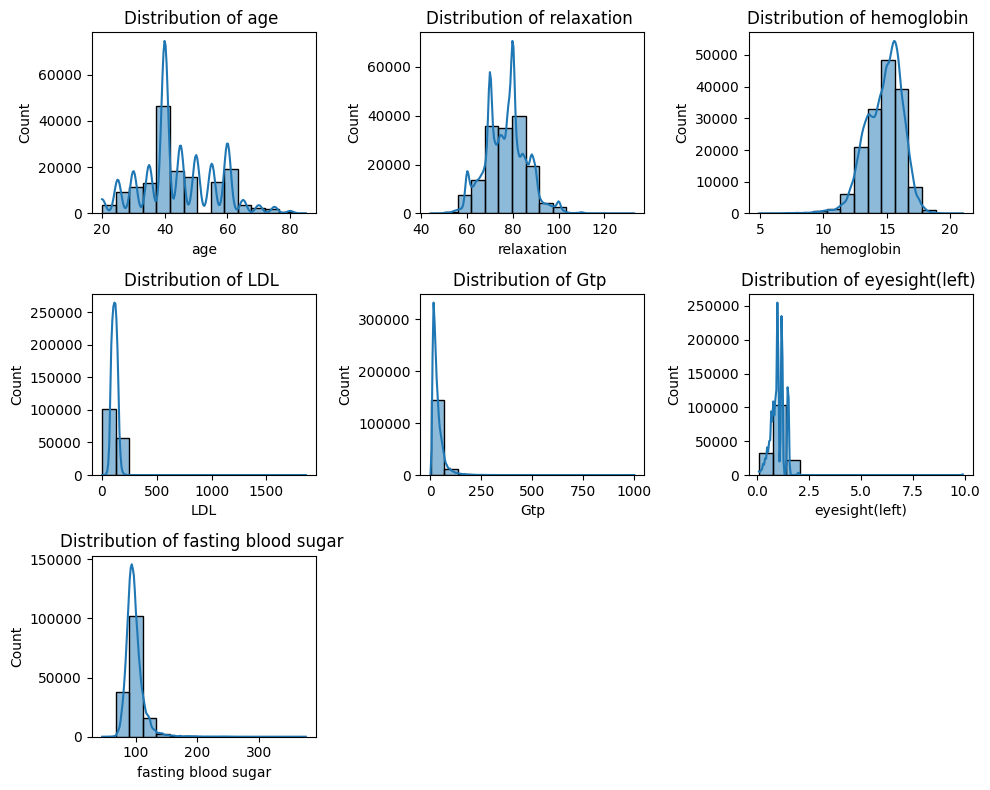

In [ ]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df1[col], kde=True, bins=15)
    plt.title(f'Distribution of {col} ')
plt.tight_layout()
plt.show()

`Scaling Features`

Initialize MinMaxScaler and StandardScaler

In [ ]:
min_max_scaler = MinMaxScaler()

Normalize the numerical columns

In [ ]:
df1[numerical_columns] = min_max_scaler.fit_transform(df1[numerical_columns])


Display the dataset after normalization

In [ ]:
df1.head()

,age,relaxation,hemoglobin,LDL,hearing(right),Gtp,eyesight(left),fasting blood sugar,hearing(left),smoking
0,0.538462,0.483146,0.720497,0.039806,1,0.025075,0.040816,0.145897,1,1
1,0.769231,0.438202,0.701863,0.067240,2,0.035105,0.051020,0.306991,2,0
2,0.000000,0.348315,0.776398,0.049489,1,0.051153,0.030612,0.100304,1,1
3,0.230769,0.494382,0.683230,0.054330,1,0.028084,0.142857,0.136778,1,0
4,0.153846,0.359551,0.652174,0.049489,1,0.015045,0.142857,0.136778,1,1


Plot histograms after scaling

 After Normalization

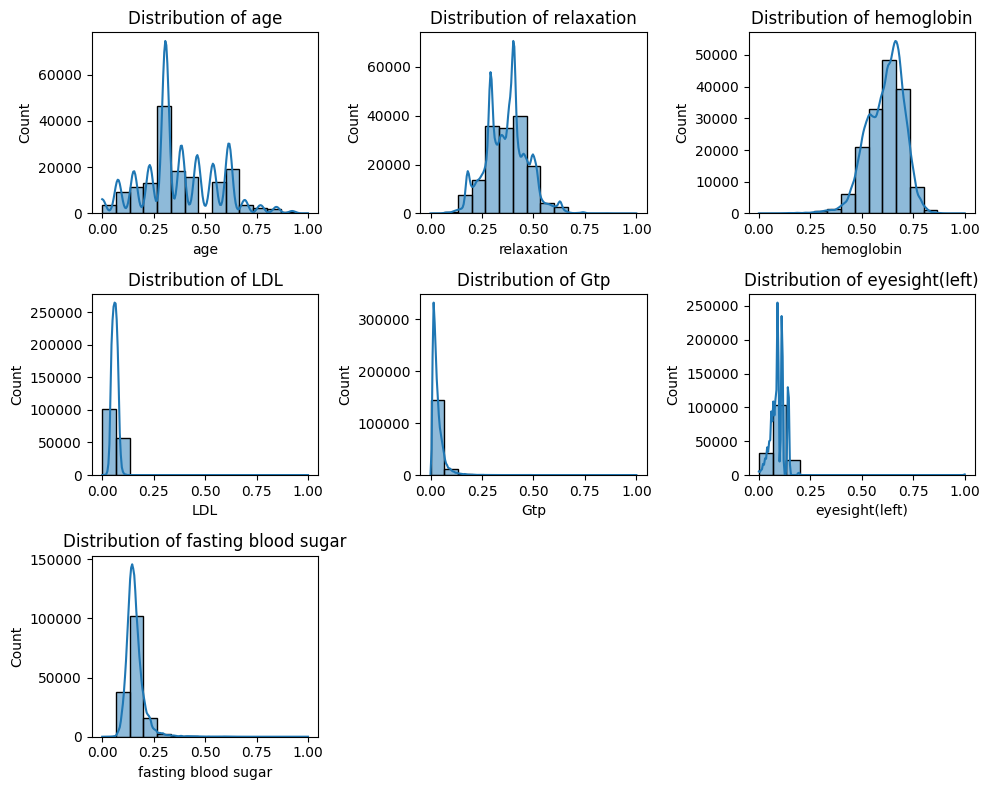

In [ ]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df1[col], kde=True, bins=15)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

In [ ]:
numerical_columns

['age',
 'relaxation',
 'hemoglobin',
 'LDL',
 'Gtp',
 'eyesight(left)',
 'fasting blood sugar']

In [ ]:
categorical_columns

['hearing(left)', 'hearing(right)']

In [ ]:
num_columns = df1.select_dtypes(include=np.number)

`Feature Transformation`

An interpretation of the skewness values for numerical columns

In [ ]:
skewness_values = num_columns.skew()
skewness_values

,0
age,0.291697
relaxation,0.176350
hemoglobin,-0.633571
LDL,6.874810
Gtp,5.414827
eyesight(left),8.890572
fasting blood sugar,3.461099


Apply log transformation to highly skewed columns

In [ ]:
skewed_columns = ['LDL', 'Gtp', 'eyesight(left)', 'fasting blood sugar']
df1[skewed_columns] = df1[skewed_columns].apply(lambda x: np.log1p(x))

In [ ]:
df1[skewed_columns].skew()

,0
LDL,3.435498
Gtp,4.163311
eyesight(left),4.578233
fasting blood sugar,2.681080


Outlier Detection using IQR method

In [ ]:
Q1 = df1[numerical_columns].quantile(0.25) #Median of the lower half of the data.
Q3 = df1[numerical_columns].quantile(0.75) #Median of the upper half of the data.
IQR = Q3 - Q1
# Identifying outliers
outliers = ((df1[numerical_columns] < (Q1 - 1.5 * IQR)) | (df1[numerical_columns] > (Q3 + 1.5 * IQR)))

# Display outlier counts per column
outliers.sum()


,0
age,682
relaxation,981
hemoglobin,1568
LDL,479
Gtp,8579
eyesight(left),2322
fasting blood sugar,7549


In [ ]:
df1.shape

(159256, 10)

Cap their values to the lower and upper bounds defined by the Interquartile Range (IQR)

In [ ]:
def cap_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[col] = df[col].clip(lower_bound, upper_bound)
    return df

In [ ]:
df2 = cap_outliers(df1.copy(), numerical_columns)

In [ ]:
df2.shape

(159256, 10)

In [ ]:
df2.head()

,age,relaxation,hemoglobin,LDL,hearing(right),Gtp,eyesight(left),fasting blood sugar,hearing(left),smoking
0,0.538462,0.483146,0.720497,0.039034,1,0.024766,0.040005,0.136187,1,1
1,0.769231,0.438202,0.701863,0.065076,2,0.034503,0.049762,0.211168,2,0
2,0.000000,0.348315,0.776398,0.048303,1,0.049888,0.030153,0.095586,1,1
3,0.230769,0.494382,0.683230,0.052906,1,0.027697,0.133531,0.128198,1,0
4,0.153846,0.359551,0.652174,0.048303,1,0.014933,0.133531,0.128198,1,1


Plot histograms after outlier removal

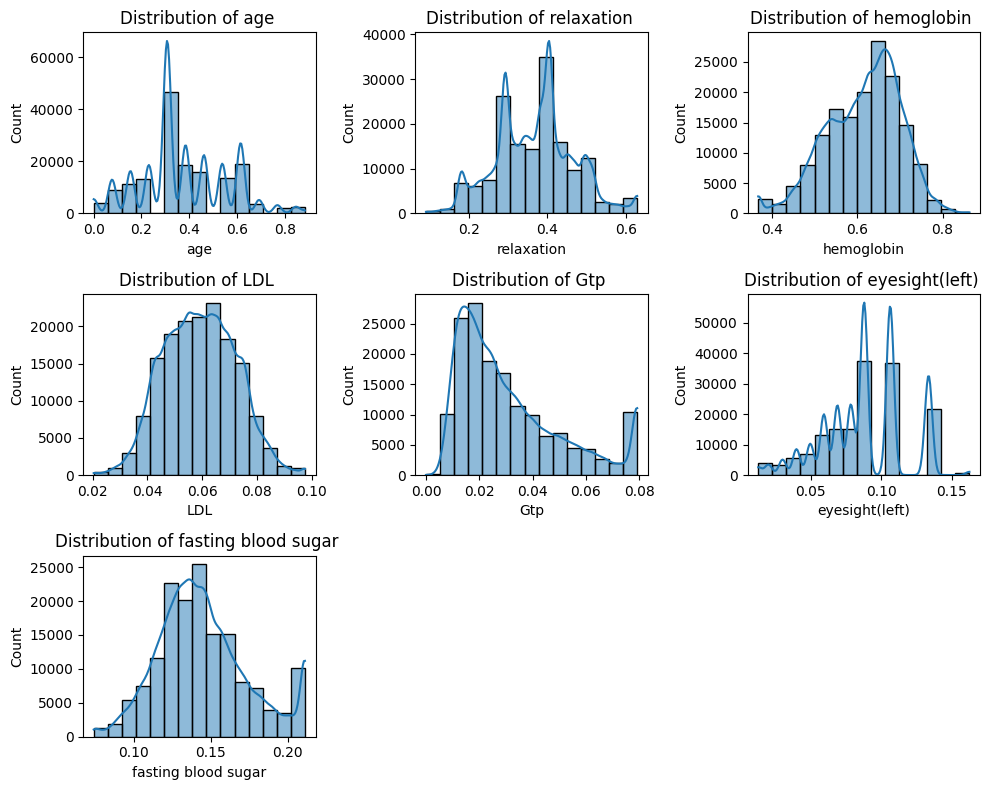

In [ ]:
plt.figure(figsize=(10, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df2[col], kde=True, bins=15)
    plt.title(f'Distribution of {col} ')

plt.tight_layout()
plt.show()

In [ ]:
correlation_matrix = df2.corr()
high_corr_pairs = correlation_matrix[correlation_matrix.abs() > 0.9]
print(high_corr_pairs)


                     age  relaxation  hemoglobin  LDL  hearing(right)  Gtp  \
age                  1.0         NaN         NaN  NaN             NaN  NaN   
relaxation           NaN         1.0         NaN  NaN             NaN  NaN   
hemoglobin           NaN         NaN         1.0  NaN             NaN  NaN   
LDL                  NaN         NaN         NaN  1.0             NaN  NaN   
hearing(right)       NaN         NaN         NaN  NaN             1.0  NaN   
Gtp                  NaN         NaN         NaN  NaN             NaN  1.0   
eyesight(left)       NaN         NaN         NaN  NaN             NaN  NaN   
fasting blood sugar  NaN         NaN         NaN  NaN             NaN  NaN   
hearing(left)        NaN         NaN         NaN  NaN             NaN  NaN   
smoking              NaN         NaN         NaN  NaN             NaN  NaN   

                     eyesight(left)  fasting blood sugar  hearing(left)  \
age                             NaN                  NaN          

In [ ]:
print("\nMissing values in each column:\n", df2.isnull().sum())


Missing values in each column:
 age                    0
relaxation             0
hemoglobin             0
LDL                    0
hearing(right)         0
Gtp                    0
eyesight(left)         0
fasting blood sugar    0
hearing(left)          0
smoking                0
dtype: int64


In [ ]:
for cat_col in categorical_columns:
    print(f"{cat_col}: {df1[cat_col].unique()}")

hearing(left): [1, 2]
Categories (2, int64): [1, 2]
hearing(right): [1, 2]
Categories (2, int64): [1, 2]


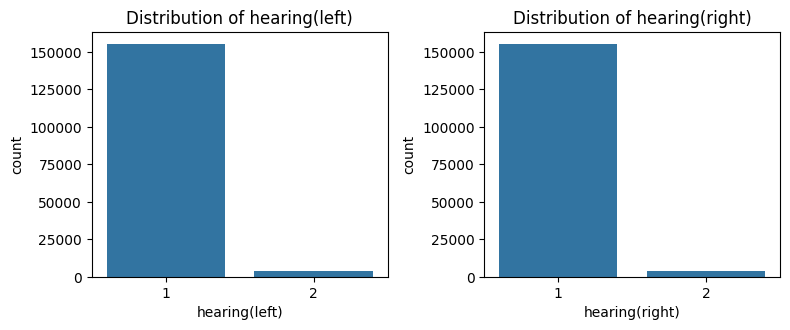

In [ ]:
plt.figure(figsize=(8, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=df2[col])
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

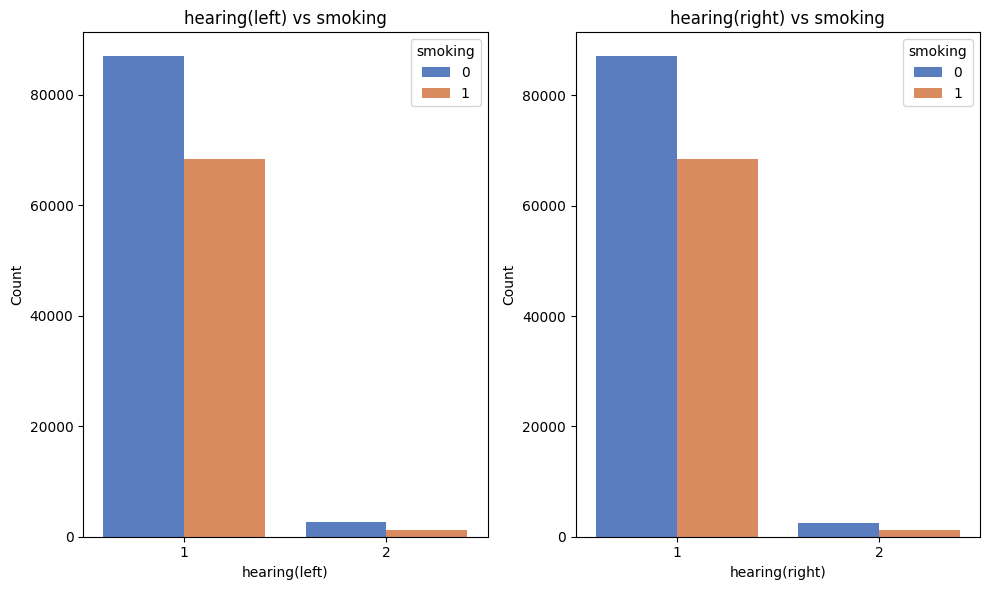

In [ ]:
plt.figure(figsize=(10, 6))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 2, i)
    sns.countplot(x=col, hue=target_column, data=df2, palette="muted")
    plt.title(f"{col} vs {target_column}")
    plt.ylabel("Count")
    plt.xlabel(col)

plt.tight_layout()
plt.show()

Bivariate Analysis

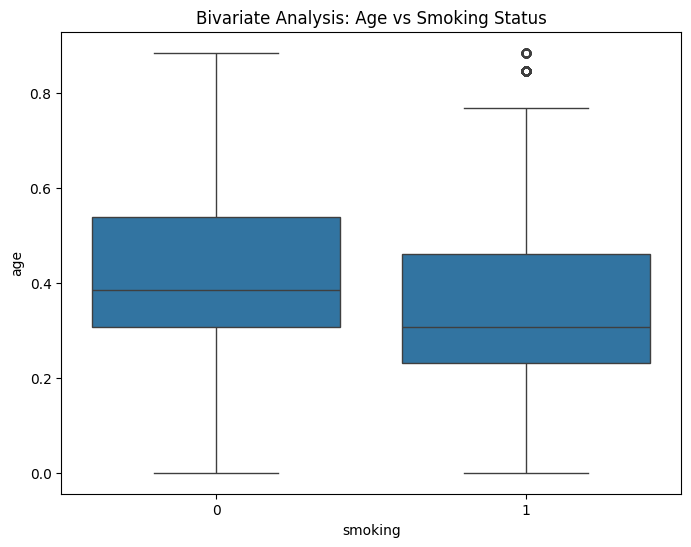

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='smoking', y='age', data=df2)
plt.title('Bivariate Analysis: Age vs Smoking Status')
plt.show()


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


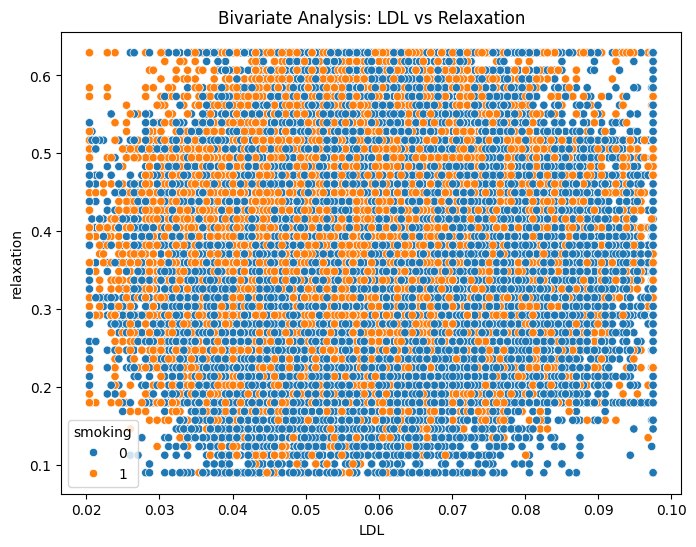

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='LDL', y='relaxation', hue='smoking', data=df2)
plt.title('Bivariate Analysis: LDL vs Relaxation')
plt.show()

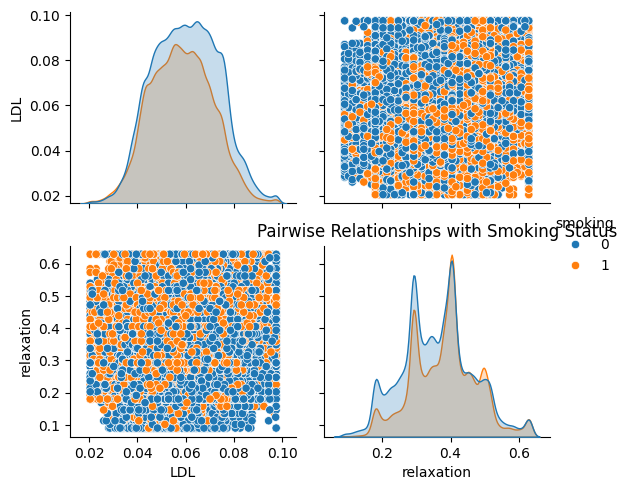

In [ ]:
sns.pairplot(df2[['LDL', 'relaxation', 'smoking']], hue='smoking')
plt.title('Pairwise Relationships with Smoking Status')
plt.tight_layout()
plt.show()


                          age  relaxation  hemoglobin       LDL  \
age                  1.000000    0.066133   -0.289670  0.114641   
relaxation           0.066133    1.000000    0.233458  0.081452   
hemoglobin          -0.289670    0.233458    1.000000  0.044730   
LDL                  0.114641    0.081452    0.044730  1.000000   
hearing(right)       0.211439   -0.015215   -0.051734 -0.012847   
Gtp                 -0.069932    0.232220    0.411188  0.067622   
eyesight(left)      -0.370158    0.010803    0.179025 -0.024885   
fasting blood sugar  0.217180    0.187798    0.110355  0.033274   
hearing(left)        0.211410   -0.011594   -0.054006 -0.011682   
smoking             -0.205970    0.110098    0.456495 -0.077028   

                     hearing(right)       Gtp  eyesight(left)  \
age                        0.211439 -0.069932       -0.370158   
relaxation                -0.015215  0.232220        0.010803   
hemoglobin                -0.051734  0.411188        0.179025   
LD

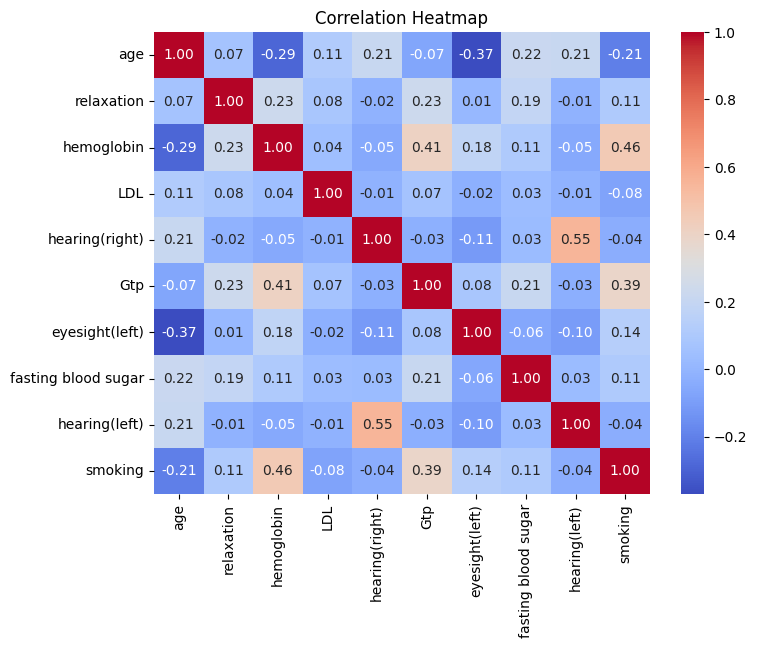

In [ ]:
# Correlation matrix
correlation_matrix = df2.corr()
print(correlation_matrix)

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
X_after = df2.drop('smoking', axis=1)  # Features
y_after = df2['smoking']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_after, y_after, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)


model_after = RandomForestClassifier(random_state=42)
model_after.fit(X_train, y_train)
y_pred_after = model_after.predict(X_test)
accuracy_after = accuracy_score(y_test, y_pred_after)
print(f"Test Accuracy Before: {accuracy_before:.4f}")
print(f"Test Accuracy After: {accuracy_after:.4f}")

Test Accuracy Before: 0.7451
Test Accuracy After: 0.7415


Save the final data after feature engineering to a CSV file

In [ ]:
final_output_path = "processed_data.csv"  # Replace with your desired output file path
df2.to_csv(final_output_path, index=False)